# ✨Bienvenidos✨ <img src="https://raw.githubusercontent.com/cgiohidalgo/JupyterHub-nbgrader/main/logo.png" alt="udenar" width="180"/>
<div style="text-align: center"> MODULO DE ANALÍTICA DE DATOS</div>
<div style="text-align: center"> Maestría de Ingeniería de Sistemas y Computación </div>
 <div style="text-align: center">Victor Bucheli (victor.bucheli@correounivalle.edu.co) - Giovanny Hidalgo (carlos.hidalgo@correounivalle.edu.co)
</div>


## _Proyecto Final Analitica de Datos..._

- Presentado por: Sandra Marcela Guerrero Calvache, Juan David Delgado, Wilmer Escobar.



## Modelos de Analitica de Datos: Naive Bayes

El dataset se compone de 657 registros de 5 cursos de A&G que se dictaron en el año 2019 cohorte II, los cuales pertenecen a cinco programas de la Facultad de Ingeniería de la Universidad del Valle





# Clasificador Naive Bayes 

Los modelos Naive Bayes son un grupo de algoritmos de clasificación extremadamente rápidos y simples que a menudo son adecuados para conjuntos de datos de muy alta dimensión. Debido a que son tan rápidos y tienen  pocos parámetros ajustables, terminan siendo muy útiles como una línea de base para un problema de clasificación. 

- Funciona bien en el caso de variables de entrada categóricas comparada con variables numéricas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve


In [2]:
#Carga los datos provenientes de un csv
datos = pd.read_csv("estudiantes_final.csv", sep=',')

In [3]:
datos

,Error1,Error2,Error3,Aceptado,Parcial1,Parcial2,Final,Tiempo,GanaCurso,Entregas
0,3.0,1.0,0.0,2,3.00,3.000,3.0000,48.97,1,6.0
1,2.0,0.0,1.0,2,4.58,3.788,4.1840,20.35,1,5.0
2,4.0,1.0,0.0,1,3.20,2.877,3.0385,56.01,1,6.0
3,4.0,2.0,0.0,2,4.15,4.008,4.0790,66.62,1,8.0
4,4.0,2.0,0.0,1,3.13,2.827,2.9785,69.71,0,7.0
...,...,...,...,...,...,...,...,...,...,...
652,6.0,3.0,2.0,2,4.00,4.850,4.4242,63.16,1,13.0
653,3.0,1.0,0.0,2,3.08,3.470,3.2775,35.11,1,6.0
654,1.0,1.0,1.0,2,3.92,3.950,3.9360,21.39,1,5.0
655,6.0,3.0,2.0,2,4.68,3.040,3.8613,24.07,1,13.0


# Exploración de datos 

In [4]:
datos['GanaCurso'].unique()

array([1, 0])

In [5]:
datos.isnull().sum()

Error1       0
Error2       0
Error3       0
Aceptado     0
Parcial1     0
Parcial2     0
Final        0
Tiempo       0
GanaCurso    0
Entregas     0
dtype: int64

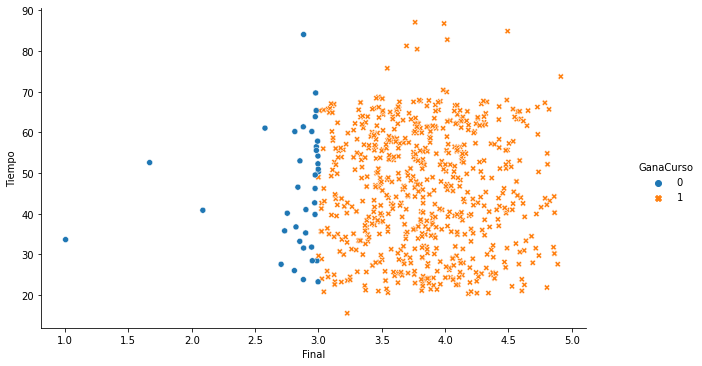

In [6]:
g=sns.relplot(x='Final',y='Tiempo',data=datos,hue='GanaCurso',style='GanaCurso')
g.fig.set_size_inches(10,5)
plt.show()

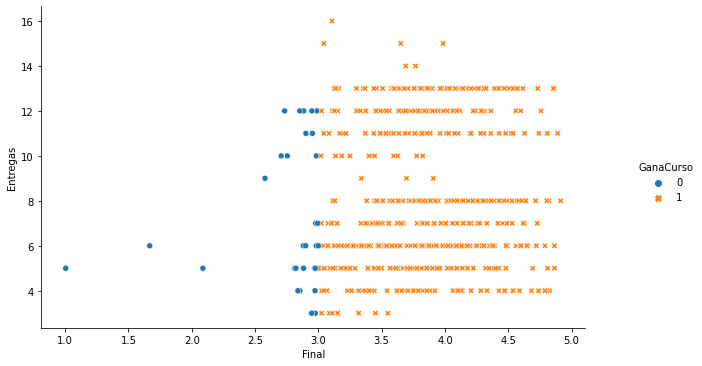

In [7]:
g=sns.relplot(x='Final',y='Entregas',data=datos,hue='GanaCurso',style='GanaCurso')
g.fig.set_size_inches(10,5)
plt.show()

/home/sandra.guerrero/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


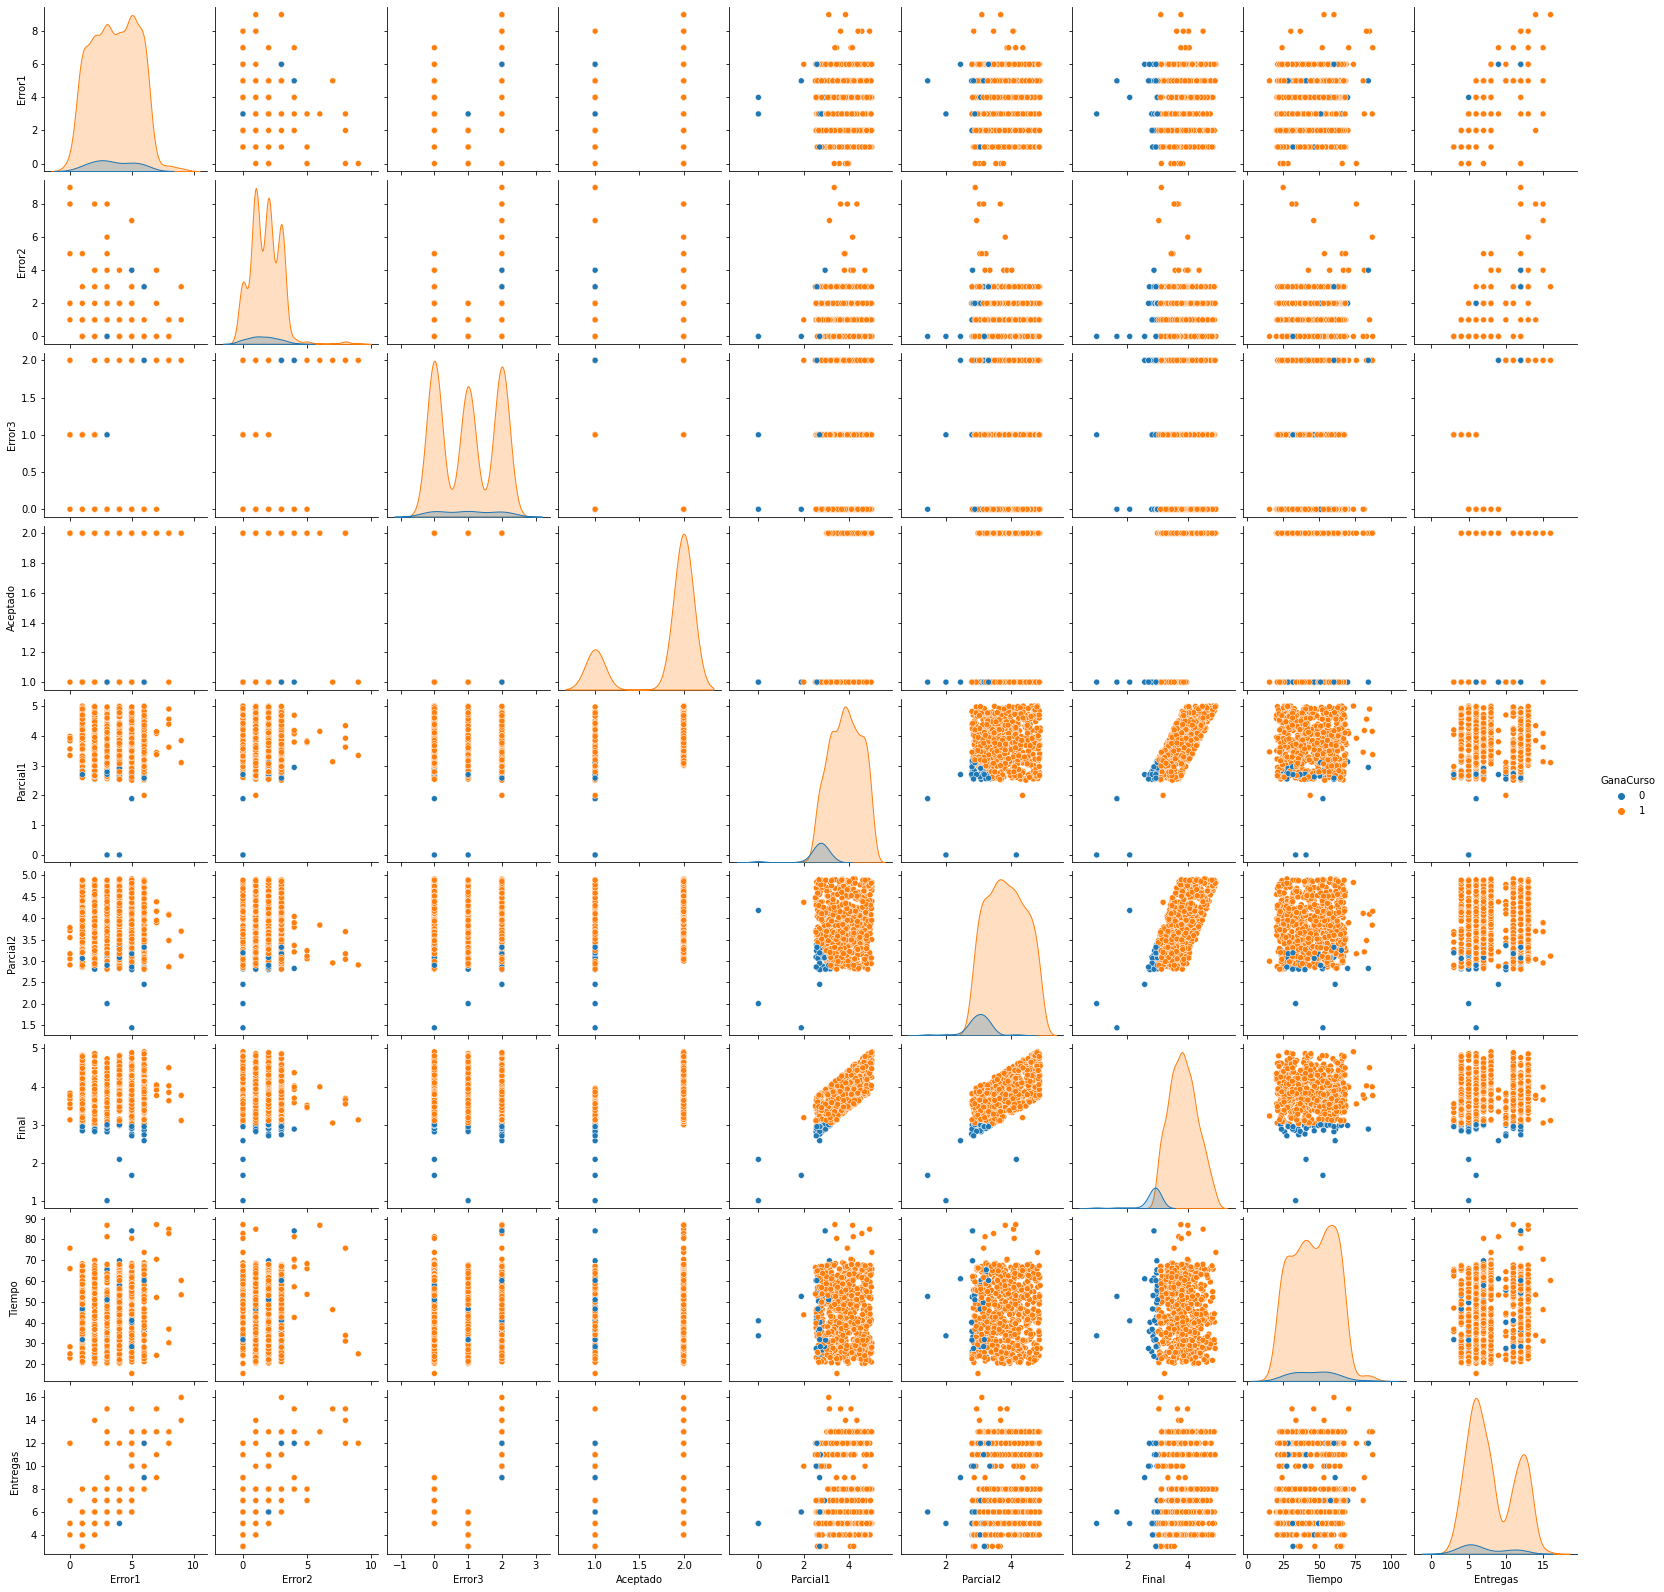

In [8]:
sns.pairplot(datos,hue="GanaCurso")
plt.show()


#  Distribución de curva de Gauss (normal) - Naive Bayes gausiano

In [9]:
from scipy.stats import norm
Gana= datos[(datos['GanaCurso']==1)]
Pierde= datos[(datos['GanaCurso']==0)]

print('Gana: %i\nPierde:%i'%(
    len(Gana),len(Pierde)))

Gana: 619
Pierde:38


In [10]:
#gauss
dt=(Gana, Pierde)
lSigma=[]
lMu=[]
lMin=[]
lMax=[]
for df in dt:
    lSigma.append(list(df.std()))
    lMu.append(list(df.mean()))
    lMin.append(list(df.min()))
    lMax.append(list(df.max()))
clases=list(datos.GanaCurso.unique())
featuresGauss= list(datos)[:-1]
featuresGauss

['Error1',
 'Error2',
 'Error3',
 'Aceptado',
 'Parcial1',
 'Parcial2',
 'Final',
 'Tiempo',
 'GanaCurso']

/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure

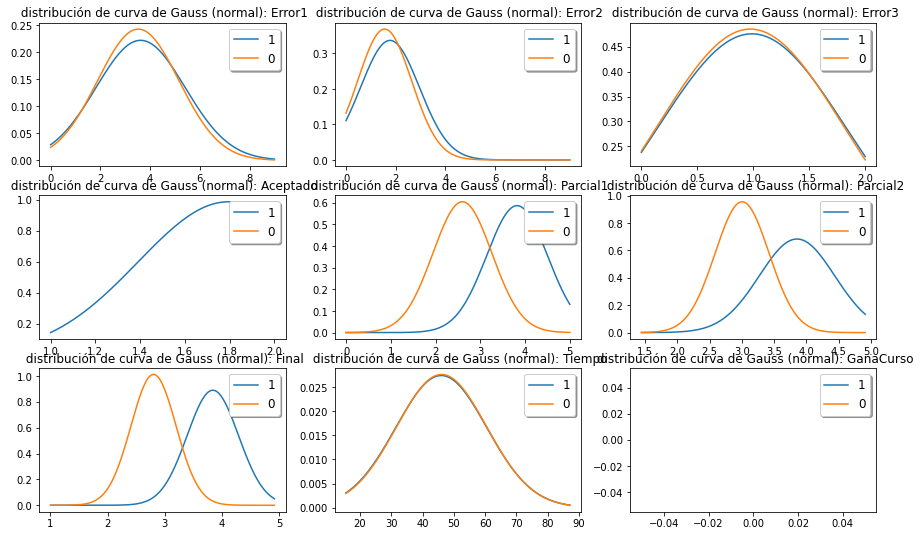

In [11]:
fig = plt.figure(1,figsize=(15,9))
for d in range(len(featuresGauss)):
    sigma=[x[d] for x in lSigma]
    mu= [x[d] for x in lMu]
    maximo=[x[d] for x in lMax]
    maximo=max(maximo)
    minimo=[x[d] for x in lMin]
    minimo=min(minimo)
    rng = np.linspace(minimo,maximo,200)
    ax = fig.add_subplot(3,3,d+1)
    for i in range(len(mu)):
        dist=norm(mu[i],sigma[i])
        ax.plot(rng, dist.pdf(rng),label=clases[i])
    legend = ax.legend(loc='upper right', shadow=True, fontsize=12)
    ax.set_title(' distribución de curva de Gauss (normal): %s'%featuresGauss[d])
plt.show()

# Ahora dividamos los datos en un conjunto de entrenamiento y validación.

In [12]:
train, test = train_test_split(datos, test_size=0.2, random_state=42)

In [13]:
X_train = train[['Error1', 'Error2', 'Error3', 'Aceptado', 'Parcial1', 'Parcial2','Tiempo']]
y_train=train.GanaCurso
X_test= test[['Error1', 'Error2', 'Error3', 'Aceptado', 'Parcial1', 'Parcial2','Tiempo']] 
y_test =test.GanaCurso 

# Modelo Naive Bayes 

In [14]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Métricas de diagnóstico


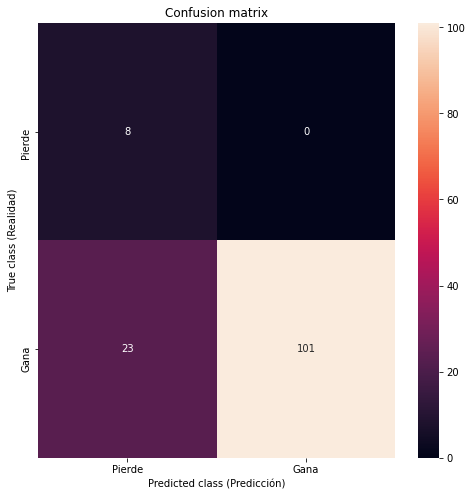

In [15]:

LABELS = ["Pierde", "Gana"]
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class (Realidad)')
    plt.xlabel('Predicted class (Predicción)')
    plt.show()
    #print (classification_report(y_test, y_pred))

y_pred = modelo.predict(X_test)
mostrar_resultados(y_test, y_pred)

In [16]:
accuracy_nb=round(accuracy_score(y_test,y_pred)* 100, 2)
acc_gaussian = round(modelo.score(X_train, y_train) * 100, 2)

accuracy = accuracy_score(y_test,y_pred)

print(classification_report(y_test, y_pred))

print('accuracy_Naive Bayes: %.1f' %accuracy)

              precision    recall  f1-score   support

           0       0.26      1.00      0.41         8
           1       1.00      0.81      0.90       124

    accuracy                           0.83       132
   macro avg       0.63      0.91      0.65       132
weighted avg       0.96      0.83      0.87       132

accuracy_Naive Bayes: 0.8


ROC SCORE:  0.907258064516129


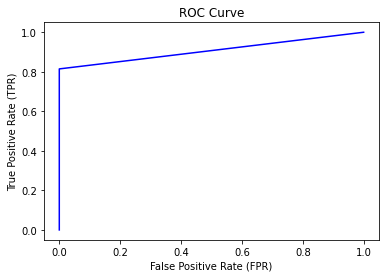

In [17]:
modeloroc = GaussianNB() #crear otro objeto del modelo DecisionTreeClassifier
modeloroc.fit(X_train,y_train) #hacer el fit para el nuevo modelo 
pred = modeloroc.predict(X_test) # predecir utiizando el dataset X_test
roc_score = roc_auc_score(y_test,pred) #  clauclar auc con n_samples, n_classes
print("ROC SCORE: ",roc_score)
fpr,tpr,threshold = roc_curve(y_test,pred)
plt.clf()
plt.plot(fpr,tpr, color='Blue', label='No Skill')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.show()

# Probar el modelo

In [30]:
#['Error1', 'Error2', 'Error3', 'Aceptado', 'Parcial1', 'Parcial2','Tiempo'] 
modelo.predict([[3,0,2,1,1,3,10]]) #correcto

array([0])

In [31]:
modelo.predict([[4,2,0,1,3.13,2.827,69.71]])


array([0])

In [32]:
modelo.predict([[0,0,9,2,2.5,2.9,2]])

array([1])

In [33]:
modelo.predict([[0,0,0,2,2.9,2.9,78]])

array([1])

In [34]:
modelo.predict([[5,0,0,1,1.89,1.446,52.59]])

array([0])

In [35]:
modelo.predict([[0,0,0,2,3,3,5.5]])

array([1])